<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#функция-для-общей-информации-о-DF" data-toc-modified-id="функция-для-общей-информации-о-DF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>функция для общей информации о DF</a></span></li><li><span><a href="#проверка-расчета-эффективности-обогащения" data-toc-modified-id="проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>проверка расчета эффективности обогащения</a></span></li><li><span><a href="#проверка-с-помощью-mae-самодельной-функцией-и-из-библиотеки" data-toc-modified-id="проверка-с-помощью-mae-самодельной-функцией-и-из-библиотеки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>проверка с помощью mae самодельной функцией и из библиотеки</a></span></li><li><span><a href="#колонки-которые-есть-в-трейн-выборке-,-но-нет-в-тестовой" data-toc-modified-id="колонки-которые-есть-в-трейн-выборке-,-но-нет-в-тестовой-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>колонки которые есть в трейн выборке , но нет в тестовой</a></span></li><li><span><a href="#предобработка" data-toc-modified-id="предобработка-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#концентация-металлов-на-этапах-очистки" data-toc-modified-id="концентация-металлов-на-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>концентация металлов на этапах очистки</a></span></li><li><span><a href="#гистограммы" data-toc-modified-id="гистограммы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>гистограммы</a></span></li><li><span><a href="#общая-концентрация" data-toc-modified-id="общая-концентрация-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>общая концентрация</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск лучшей модели</a></span></li><li><span><a href="#Финальная-модель-и-проверка-на-тесте" data-toc-modified-id="Финальная-модель-и-проверка-на-тесте-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Финальная модель и проверка на тесте</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression , LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
gold_df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Сделаем дата сет , что бы сделать проверку теста в будущем

In [3]:
gold_df_train = gold_df_train.set_index('date')
gold_df_test = gold_df_test.set_index('date')
gold_df = gold_df.set_index('date')

### функция для общей информации о DF

In [4]:
def df_info(df):
    print(df.shape)
    print(df.info())
    
    if df.isna().values.any():
        display(pd.DataFrame(df.isna().mean().to_frame(name='gaps')).style.format({'gaps' : '{:.2%}'}))
    else: print('No gaps')
        
    
    print('есть ли дупликаты',df.duplicated().values.any())
    
    display(df.head(10))
    
df_info(gold_df_train)

(14149, 86)
<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                 

,gaps
final.output.concentrate_ag,0.01%
final.output.concentrate_pb,0.01%
final.output.concentrate_sol,1.49%
final.output.concentrate_au,0.00%
final.output.recovery,0.00%
final.output.tail_ag,0.00%
final.output.tail_pb,0.71%
final.output.tail_sol,0.04%
final.output.tail_au,0.00%
primary_cleaner.input.sulfate,0.14%


есть ли дупликаты False


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [5]:
df_info(gold_df_test)

(5290, 52)
<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    52

,gaps
primary_cleaner.input.sulfate,0.08%
primary_cleaner.input.depressant,0.09%
primary_cleaner.input.feed_size,0.00%
primary_cleaner.input.xanthate,0.08%
primary_cleaner.state.floatbank8_a_air,0.00%
primary_cleaner.state.floatbank8_a_level,0.00%
primary_cleaner.state.floatbank8_b_air,0.00%
primary_cleaner.state.floatbank8_b_level,0.00%
primary_cleaner.state.floatbank8_c_air,0.00%
primary_cleaner.state.floatbank8_c_level,0.00%


есть ли дупликаты False


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


### проверка расчета эффективности обогащения

In [6]:
C = gold_df_train['rougher.output.concentrate_au']
F = gold_df_train['rougher.input.feed_au']
T = gold_df_train['rougher.output.tail_au']

recovery = pd.DataFrame(((C * (F - T)) * 100/ (F * (C - T))), columns=['recovery'])
recovery.head()

,recovery
date,
2016-01-15 00:00:00,87.107763
2016-01-15 01:00:00,86.843261
2016-01-15 02:00:00,86.842308
2016-01-15 03:00:00,87.226430
2016-01-15 04:00:00,86.688794


In [7]:
gold_df_train['rougher.output.recovery'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

### проверка с помощью mae самодельной функцией и из библиотеки

In [8]:
def mae(X, y):
    return sum(abs(y - X)) / len(X) 
mae(recovery['recovery'], gold_df_train['rougher.output.recovery'])

1.1131451184435918e-14

In [9]:
mean_absolute_error(recovery['recovery'], gold_df_train['rougher.output.recovery'])

1.1131451184435918e-14

Ошибка 0 а это значит , что эффективность посчитанна верно

### колонки которые есть в трейн выборке , но нет в тестовой 

In [10]:
values = [i for i in gold_df_train.columns if i not in gold_df_test.columns]
print(*values, sep='\n')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

- в тестовой выборке не доступны параметры продукта(выходные после очисток)
    - что достаточно логично , тк мы не должны знать их до предскзания

### предобработка 

In [11]:
# импортируем библиотеку
from sklearn.impute import KNNImputer

# определяем импортер
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# устанавливаем импортер на Х
X = gold_df_train.copy()


imputer.fit(X);

In [12]:
# восстанавливаем данные
X1 = imputer.transform(X)

# полученные данные преобразовываем в DataFrame
df_train = pd.DataFrame(X1, columns=X.columns)
# df_train.isnull().sum()

# df_train['date'] = gold_df_train['date']


In [13]:
from sklearn.impute import KNNImputer

# определяем импортер
imputer = KNNImputer(n_neighbors=5, weights='uniform')

df_test = gold_df_test.copy()
# df_test.drop(columns='date', inplace=True)

imputer.fit(df_test)

X1 = imputer.transform(df_test)

# полученные данные преобразовываем в DataFrame
df_test = pd.DataFrame(X1, columns=df_test.columns)

# df_test['date'] = gold_df_test['date']

(False, False)

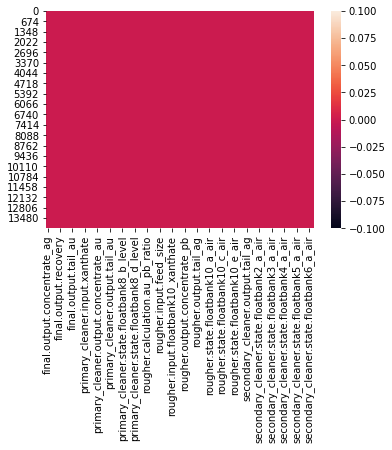

In [14]:
sns.heatmap(df_train.isnull());
df_train.isnull().values.any(), df_test.isnull().values.any()

- убрал все пропуски с помощью ближайших соседей 

## Анализ данных

###  концентация металлов на этапах очистки 

этап очистки rougher -> металл ag -> 11.775812314356036
этап очистки primary_cleaner -> металл ag -> 8.200915815165981
этап очистки final -> металл ag -> 5.1419655406732705


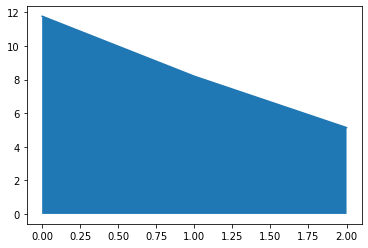

этап очистки rougher -> металл pb -> 7.664554751481546
этап очистки primary_cleaner -> металл pb -> 9.579226919668463
этап очистки final -> металл pb -> 10.132967719616573


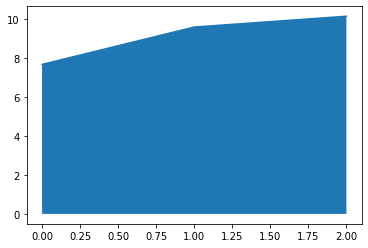

этап очистки rougher -> металл au -> 19.43995785143646
этап очистки primary_cleaner -> металл au -> 32.386835978391346
этап очистки final -> металл au -> 44.00379162105571


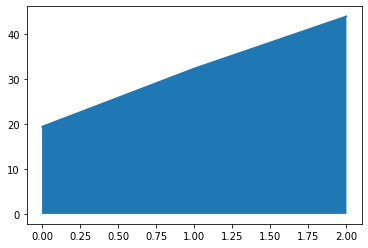

[19.43995785143646, 32.386835978391346, 44.00379162105571]

In [15]:
steps = ['rougher', 'primary_cleaner', 'final'] #'secondary_cleaner'
materials = ['ag', 'pb', 'au']

for material in materials:
    val = []
    for step in steps:
        col = step + '.output.concentrate_' + material
        val.append(df_train[col].mean())
        print(f'этап очистки {step} -> металл {material} -> {df_train[col].mean()}')
    plt.plot([0, 1, 2], val)
    plt.fill_between([0, 1, 2], val)
    plt.show()
        
val        


-  видно , что с каждой итерацией очистки серебра и **свинца** становится меньше , а золота все больше 
    - что значит , что очистка работает правильно 
- у вторичной очистки не было концентрации металлов , поэтому тут нет этих данных

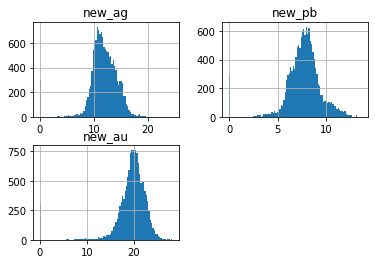

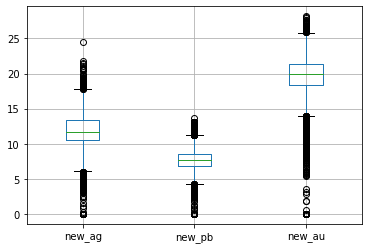

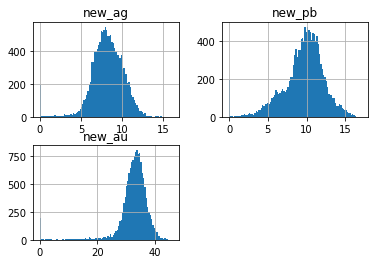

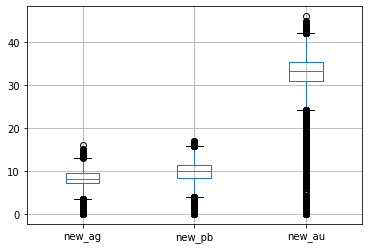

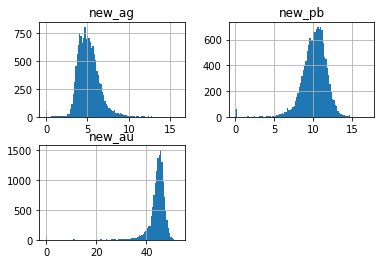

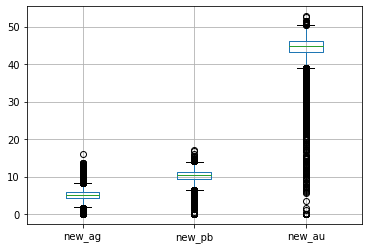

In [16]:
steps = ['rougher', 'primary_cleaner', 'final'] #'secondary_cleaner'
materials = ['ag', 'pb', 'au']

for step in steps:
    df_1 = pd.DataFrame()
    for material in materials:
        col = step + '.output.concentrate_' + material
        df_1['new_' + material] = df_train[col]
    df_1.hist(bins=100)
    plt.show()
    df_1.boxplot()
    plt.show()


<Figure size 864x864 with 0 Axes>

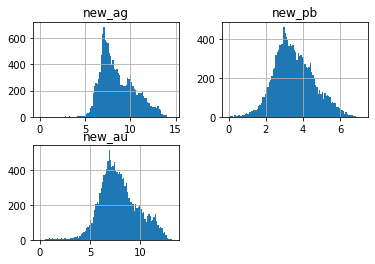

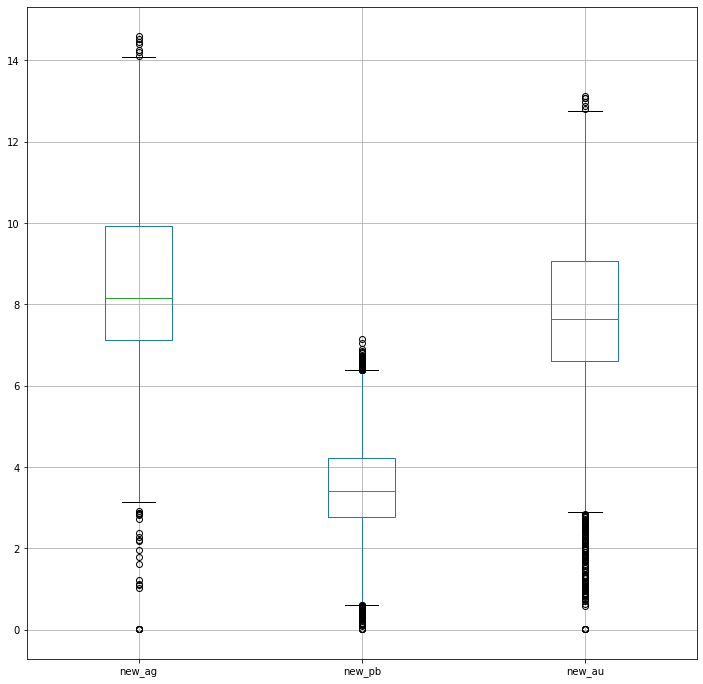

In [17]:
materials = ['ag', 'pb', 'au']
df = pd.DataFrame()
for material in materials:
     df['new_'+material] = df_train['rougher.input.feed_'+material]
plt.figure(figsize=(12, 12))
df.hist(bins=100)
plt.show()
plt.figure(figsize=(12, 12))
df.boxplot()
plt.show()

In [19]:
outlier_train_df = df_train.copy()



- выбросы убрал правилом 3х сигм

Гистограммы постоены , и можно удалить выбросы следующим скриптом

### гистограммы

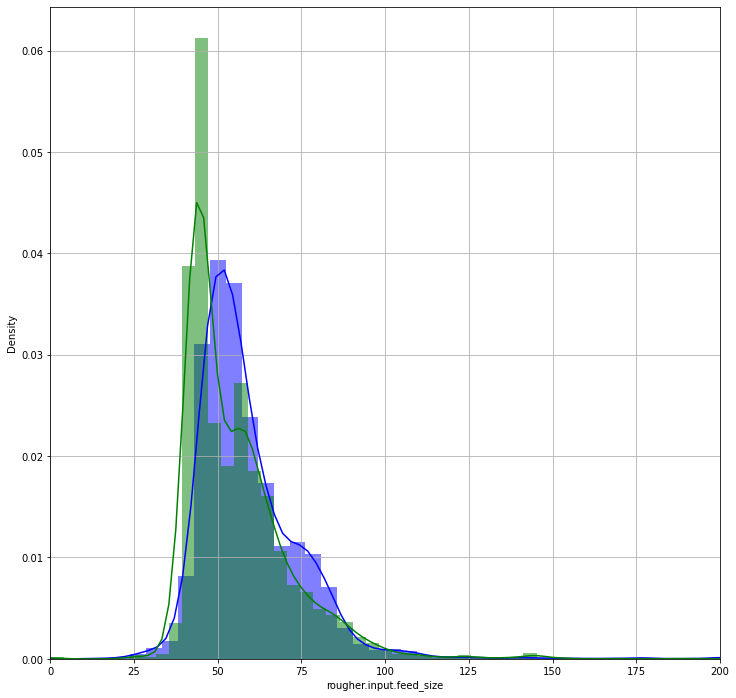

In [23]:
plt.figure(figsize=(12, 12))
plt.xlim(0, 200)
# plt.ylim(0, 1)
plt.hist(data=df_train, x='rougher.input.feed_size', bins=100, density=True, alpha=0.5, color='blue')
sns.kdeplot(df_train['rougher.input.feed_size'], color='blue')
plt.hist(data=df_test, x='rougher.input.feed_size', bins=100, density=True, alpha=0.5, color='green')
sns.kdeplot(df_test['rougher.input.feed_size'], color='green')
plt.grid()

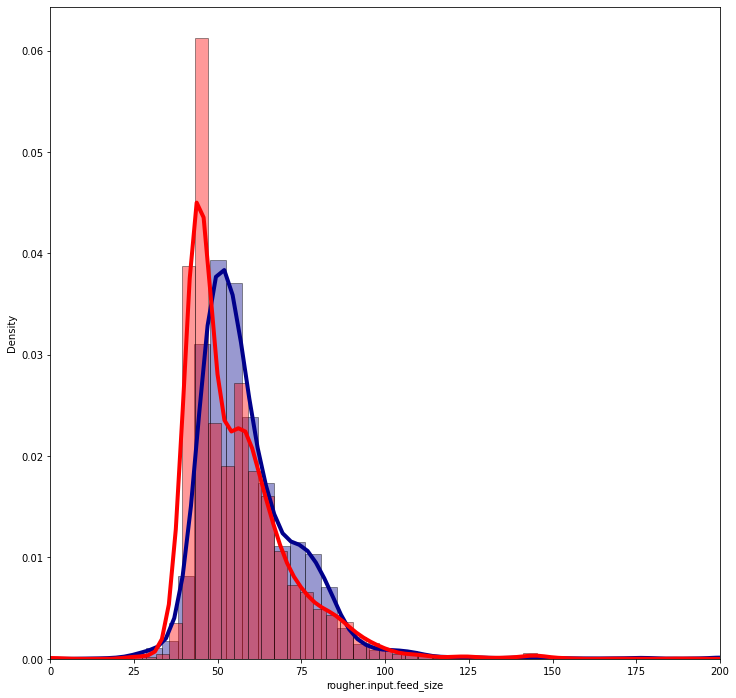

In [24]:
plt.figure(figsize=(12, 12))
plt.xlim(0, 200)

sns.distplot(df_train['rougher.input.feed_size'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

sns.distplot(df_test['rougher.input.feed_size'], hist=True, kde=True, 
             bins=100, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

- выборки частично похожи , оба набора данных отрицптельно скошенны

### общая концентрация 

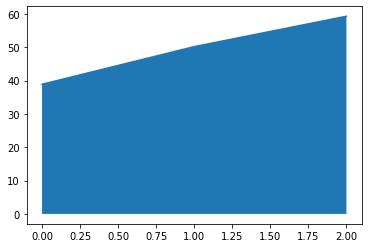

In [25]:
steps = ['rougher', 'primary_cleaner', 'final'] #'secondary_cleaner'
materials = ['ag', 'pb', 'au']
val = []

for step in steps: 
    count = 0 
    for material in materials:
        col = step + '.output.concentrate_' + material
        count += df_train[col].mean()
    val.append(count)
plt.plot([0, 1, 2], val)
plt.fill_between([0, 1, 2], val)
plt.show()

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

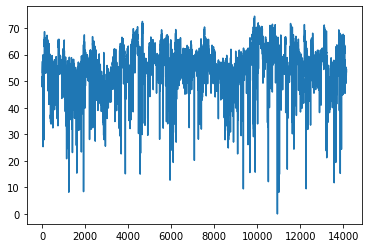

In [26]:

df_train['feed_conc'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] +\
            df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_au']
df_train['rougher_conc'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] +\
            df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au']
df_train['final_conc'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] +\
            df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au']
plt.plot(np.arange(len(df_train['feed_conc'])), df_train['feed_conc']);
plt.show()


In [27]:
df_train = df_train[df_train['final_conc'] > 0]
df_train = df_train[df_train['rougher_conc'] > 0]
df_train = df_train[df_train['feed_conc'] > 0]

df_train.shape

(13795, 89)

## Модель

### sMAPE

In [28]:
def smape(y, predict):
    return (sum(abs(y - predict) / (abs(y + predict) / 2)) * 100) / len(y)

def total_smape(rougher, final): 
    return .25 * rougher + .75 * final

### Поиск лучшей модели

In [29]:
y_train_rougher = df_train['rougher.output.recovery']
y_train_final =  df_train['final.output.recovery']

y_train_rougher.shape, y_train_final.head()

((13795,),
 0    70.541216
 1    69.266198
 2    68.116445
 3    68.347543
 4    66.927016
 Name: final.output.recovery, dtype: float64)

In [30]:
X_train = df_train.drop(columns=values + ['final_conc', 'rougher_conc', 'feed_conc'])

# X_train.drop(columns='date', inplace=True)

In [31]:

X_train.shape

(13795, 52)

- удаляю даты , тк они уникальные и будут мешать обучению

In [32]:
lm_r = LinearRegression()

# Обучим модель для этапа флотации
smape_lm_r = cross_val_score(lm_r, X_train, y_train_rougher, 
                             scoring = make_scorer(smape),
                             cv = 5,
                             n_jobs = -1).mean()

smape_lm_r

7.194682542282374

- **Воспользуемся GridSearchCV, что бы перебрать параметры и сделать кросс валидацию**
    - **Будем проверять модели LinearRegression, DecisionTreeRegressor, RandomForestRegressor, LassoCV, ElasticNetCV**

In [33]:
def cv(model_1, model_2, parameters):
    grid_search_f = GridSearchCV(estimator = model_1,  
                               param_grid = parameters,
                               scoring = make_scorer(smape),
                               cv = 5,
                               verbose=1)

    grid_search_f.fit(X_train, y_train_final)

    print(grid_search_f.best_params_)
    print('    sMAPE final: {:.2f} %'.format(grid_search_f.best_score_))
    
    
    grid_search_r = GridSearchCV(estimator = model_2,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

    grid_search_r.fit(X_train, y_train_rougher)

    print(grid_search_r.best_params_)
    print('    sMAPE rougher: {:.2f} %'.format(grid_search_r.best_score_))
    print('sMAPE итоговое: {:.2f} %'.format(total_smape(grid_search_r.best_score_, grid_search_f.best_score_)))
cv(LinearRegression(), LinearRegression(), {"n_jobs" : ['None', 1, 3, -1, -3], 'positive' : ['True', 'False'], 'fit_intercept' : ['True', 'False']})

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'fit_intercept': 'True', 'n_jobs': 'None', 'positive': 'True'}
    sMAPE final: 10.02 %
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'fit_intercept': 'True', 'n_jobs': 'None', 'positive': 'True'}
    sMAPE rougher: 7.04 %
sMAPE итоговое: 9.28 %


- написал функцию для обучения , но подумал будет быстрее отделтно писать каждую как всегда ))

In [34]:
%%time
log_reg_rougher = LinearRegression()

parameters = {"n_jobs" : ['None', 1, 3, -1, -3]
              , 'positive' : ['True', 'False']
              , 'fit_intercept' : ['True', 'False']
             }
grid_search_r = GridSearchCV(estimator = log_reg_rougher,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_r.fit(X_train, y_train_rougher)

print(grid_search_r.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_r.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'fit_intercept': 'True', 'n_jobs': 'None', 'positive': 'True'}
    sMAPE rougher: 7.04 %
CPU times: user 10.6 s, sys: 9.49 s, total: 20.1 s
Wall time: 20.1 s


In [35]:
%%time
log_reg_final = LinearRegression()

# инициализируем GridSearchCV
parameters = {"n_jobs" : ['None', 1, 3, -1, -3]
              , 'positive' : ['True', 'False']
              , 'fit_intercept' : ['True', 'False']
             }
grid_search_f = GridSearchCV(estimator = log_reg_final,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_f.fit(X_train, y_train_final)

print(grid_search_f.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_f.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'fit_intercept': 'True', 'n_jobs': 'None', 'positive': 'True'}
    sMAPE rougher: 10.02 %
CPU times: user 10.8 s, sys: 9.28 s, total: 20.1 s
Wall time: 20.1 s


In [36]:
%%time
tree_rougher = DecisionTreeRegressor(random_state = 1234)

parameters = {'criterion' :['squared_error', 'friedman_mse', 'absolute_error']
             ,'max_depth' : [3, 5, 7]
             ,'min_samples_split' : [3, 5, 7]}

grid_search_r = GridSearchCV(estimator = tree_rougher,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_r.fit(X_train, y_train_rougher)

print(grid_search_r.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_r.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 5}
    sMAPE rougher: 8.80 %
CPU times: user 13.5 s, sys: 256 ms, total: 13.8 s
Wall time: 13.8 s


In [37]:
%%time
tree_final = DecisionTreeRegressor(random_state = 1234)

parameters = {'criterion' :['squared_error', 'friedman_mse', 'absolute_error']
             ,'max_depth' : [3, 5, 7]
             ,'min_samples_split' : [3, 5, 7]}

grid_search_f = GridSearchCV(estimator = tree_final,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_f.fit(X_train, y_train_final)

print(grid_search_r.best_params_)
print('    sMAPE final: {:.2f} %'.format(grid_search_f.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 5}
    sMAPE final: 11.94 %
CPU times: user 13.8 s, sys: 177 ms, total: 14 s
Wall time: 14 s


In [38]:
'sMAPE итоговое: {:.2f} %'.format(total_smape(grid_search_r.best_score_, grid_search_f.best_score_))

'sMAPE итоговое: 11.16 %'

In [41]:
%%time
lasso_rougher = LassoCV()

parameters = {
             'n_alphas' : [100, 150]
              , 'max_iter' : [100, 500, 100]}

grid_search_r = GridSearchCV(estimator = lasso_rougher,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_r.fit(X_train, y_train_rougher)

best_params_r = grid_search_r.best_params_

print(best_params_r)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_r.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'max_iter': 100, 'n_alphas': 150}
    sMAPE rougher: 6.69 %
CPU times: user 31.2 s, sys: 35.1 s, total: 1min 6s
Wall time: 1min 6s


In [42]:
%%time
lasso_final = LassoCV()

parameters = {'n_alphas' : [100, 150]
              , 'max_iter' : [100, 500, 100]}

grid_search_f = GridSearchCV(estimator = lasso_final,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_f.fit(X_train, y_train_final)

print(grid_search_f.best_params_)
print('    sMAPE final: {:.2f} %'.format(grid_search_f.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'max_iter': 100, 'n_alphas': 150}
    sMAPE final: 9.91 %
CPU times: user 24.2 s, sys: 23.1 s, total: 47.3 s
Wall time: 47.4 s


In [43]:
'sMAPE итоговое: {:.2f} %'.format(total_smape(grid_search_r.best_score_, grid_search_f.best_score_))

'sMAPE итоговое: 9.11 %'

In [44]:
%%time
elastic_rougher = ElasticNetCV()

parameters = {'n_alphas' : [100, 150]
              , 'max_iter' : [100, 500, 100]}

grid_search_r = GridSearchCV(estimator = elastic_rougher,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_r.fit(X_train, y_train_rougher)

print(grid_search_r.best_params_)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_r.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'max_iter': 100, 'n_alphas': 100}
    sMAPE rougher: 6.69 %
CPU times: user 32.1 s, sys: 35.6 s, total: 1min 7s
Wall time: 1min 7s


In [45]:
%%time
elastic_final = ElasticNetCV()

parameters = {'n_alphas' : [100, 150]
              , 'max_iter' : [100, 500, 100]}

grid_search_f = GridSearchCV(estimator = elastic_final,  
                           param_grid = parameters,
                           scoring = make_scorer(smape),
                           cv = 5,
                           verbose=1)

grid_search_f.fit(X_train, y_train_final)

best_params_f = grid_search_f.best_params_

print(best_params_f)
print('    sMAPE rougher: {:.2f} %'.format(grid_search_f.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'max_iter': 100, 'n_alphas': 150}
    sMAPE rougher: 9.91 %
CPU times: user 23.3 s, sys: 21.6 s, total: 44.9 s
Wall time: 45.2 s


In [46]:
'sMAPE итоговое: {:.2f} %'.format(total_smape(grid_search_r.best_score_, grid_search_f.best_score_))

'sMAPE итоговое: 9.11 %'

- **после изучения 4х моделей , я решил:**
    - **для rouhger буду использовать LassoCV с параметрами max_iter = 500, n_alphas = 100 sMAPE ~ 6.69%**
    - **для final буду использовать ElasticNetCV с параметрами max_iter = 100, n_alphas = 100 sMAPE ~ 9.91%**

### Финальная модель и проверка на тесте 

сначала для проверки разобъем выборку на train и valid  и обучим 2 модедли для флоктации и финальной очистки соответственно 

In [48]:
final_model_r = LassoCV(max_iter=100, n_alphas=150)

final_model_r.fit(X_train, y_train_rougher)

LassoCV(max_iter=100, n_alphas=150)

In [49]:
elastic_model_f = ElasticNetCV(max_iter=100, n_alphas=150)

elastic_model_f.fit(X_train, y_train_final)

ElasticNetCV(max_iter=100, n_alphas=150)

In [50]:
df_test = gold_df_test.copy()

In [51]:
df_test.dropna(inplace=True)

In [54]:
y_true_r = gold_df.loc[df_test.index, 'rougher.output.recovery'].dropna()
y_true_f = gold_df.loc[df_test.index, 'final.output.recovery'].dropna()

y_true_r.shape

(5229,)

In [55]:
df_new_test =  df_test

In [60]:
final_smape_r = smape(y_true_r, final_model_r.predict(df_new_test))
'sMAPE rougher: {:.2f} %'.format(final_smape_r)

'sMAPE rougher: 8.10 %'

In [61]:
final_smape_f = smape(y_true_f, elastic_model_f.predict(df_new_test))
'sMAPE final: {:.2f} %'.format(final_smape_f)

'sMAPE final: 8.48 %'

In [62]:
final_smape = total_smape(final_smape_r, final_smape_f)
'sMAPE итоговое: {:.2f} %'.format(final_smape)

'sMAPE итоговое: 8.38 %'

- проврел константной моделю , на сколько основная отличаемся от него 

In [63]:
dummy_regr_f = DummyRegressor(strategy="mean")
dummy_regr_f.fit(X_train, y_train_final)
dummy_f = smape(y_true_f, dummy_regr_f.predict(df_new_test))

In [64]:
dummy_regr_r = DummyRegressor(strategy="mean")
dummy_regr_r.fit(X_train, y_train_rougher)
dummy_r = smape(y_true_r, dummy_regr_r.predict(df_new_test))

In [65]:
final_smape_r - dummy_r, final_smape_f - dummy_f

(-0.8327714951027705, -1.0776983133918296)

Мои модели лучше ~ на 1

In [66]:
dymmy_final = total_smape(dummy_r, dummy_f)
'sMAPE итоговое: {:.2f} %'.format(dymmy_final)

'sMAPE итоговое: 9.40 %'

## Вывод 

Данные обучены на моделях LinearRegression, DecisionTreeRegressor, RandomForestRegressor, LassoCV, ElasticNetCV.

Применены техники кросс-валидации для оценки качества моделей и GridSearchCV для поиска оптимальных гиперпараметров.

Лучший результат дала модели LassoCV, ElasticNetCV.

Метрика smape получилась следующая:
 
smape на тестовой выборке:
 - smape флотация: 8.10 %
 - smape очистка: 8.48 %
 - **smape итоговое: 8.38%**
 
Итоговое sMAPE на константной модели 9.40 %